In [1]:
import cv2 as cv
import numpy as np


In [2]:
from google.colab.patches import cv2_imshow

In [ ]:
capture = cv.VideoCapture(1)
cv.waitKey(0)

-1

OPENING WEBCAM ON GOOGLE COLAB

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

CREATING BLANK IMAGE and drawing shapes


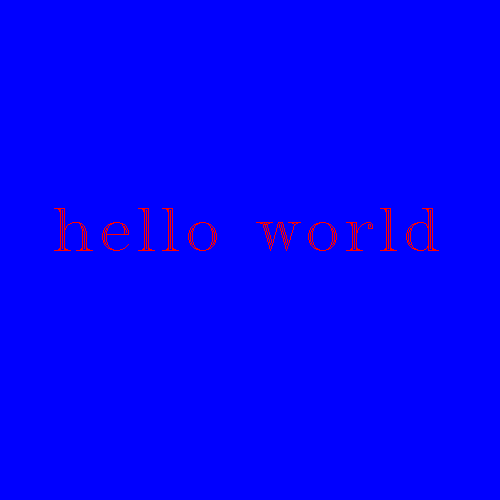

In [ ]:
blank = np.zeros((500,500,3),dtype='uint8')
blank[:]=(255,0,0) # giving a blue color
# Rectangle
'''cv.rectangle(blank,(0,0),(250,500),(0,0,255),thickness =cv.FILLED)'''
# Circle
'''cv2_imshow(cv.circle(blank,(250,250),20,(0,255,0),thickness=2))'''
# Filling concentric circles
'''for i in range(100,0,-10):
  cv.circle(blank,(250,250),i,(0,i,0),thickness=2)
cv2_imshow(blank)'''
# Drawing a line, multiple lines
'''for i in range(0,500,10):
  cv.line(blank,(0,0),(i,500),(255,0,255),thickness=2)
for i in range(500,0,-10):
  cv.line(blank,(0,0),(500,i),(255,0,255),thickness=2)
cv2_imshow(blank)'''
#Putting a text
'''cv.putText(blank,'hello world',(50,250),cv.FONT_HERSHEY_TRIPLEX,2.0,(0,0,255),thickness=1)
cv2_imshow(blank)'''

BASIC FUNCTIONS IN OPENCV

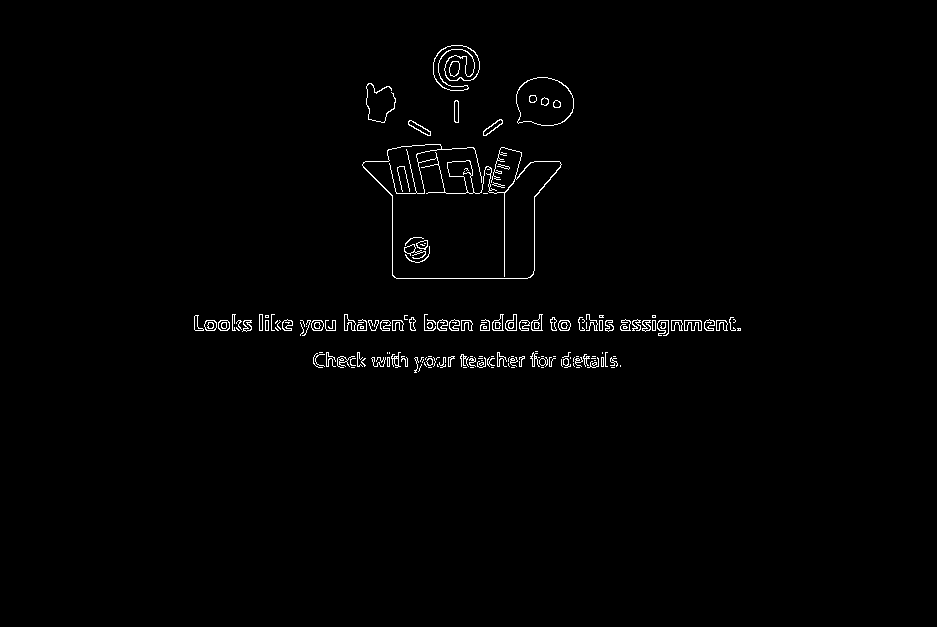

In [ ]:
#converting an image to greyscale
image = cv.imread('/content/0.PNG')
#gray = cv.cvtColor(image,cv.COLOR_BAYER_BG2GRAY)
'''cv2_imshow(image)'''
#Blurr (using gausssian blur for now)
'''blur = cv.GaussianBlur(image,(5,5),cv.BORDER_DEFAULT)
cv2_imshow(blur)'''
#Edge detection
'''canny = cv.Canny(image,10,10)
cv2_imshow(canny)'''


IMAGE TRANSFORMATIONS

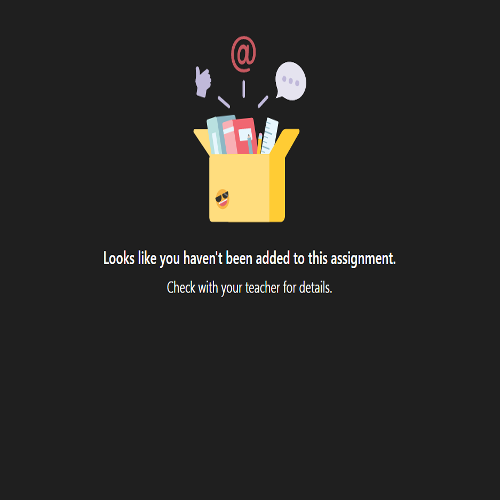

In [ ]:
#translation (shifting image left right up and down)
'''def translation(img,x,y):
  transmat = np.float32([[1,0,x],[0,1,y]])
  dimensions = (image.shape[0],image.shape[1])
  return cv.warpAffine(img,transmat,dimensions)
translated = translation(image,-100,150)
cv2_imshow(translated)'''
#rotation of image 
'''def rotation(img,angle,rotpoint):
  height,width = img.shape[:2]
  if rotpoint == None:
    rotpoint = ((height//2),(width//2))
  rotmat = cv.getRotationMatrix2D(rotpoint,angle,1.0)
  dimensions = (image.shape[0],image.shape[1])
  return cv.warpAffine(img,rotmat,dimensions)
rotate = rotation(image,45,(0,0))
cv2_imshow(rotate)'''
#resizing
'''cv2_imshow(cv.resize(image,(500,500),interpolation = cv.INTER_CUBIC))'''


CONTOUR DETECTION

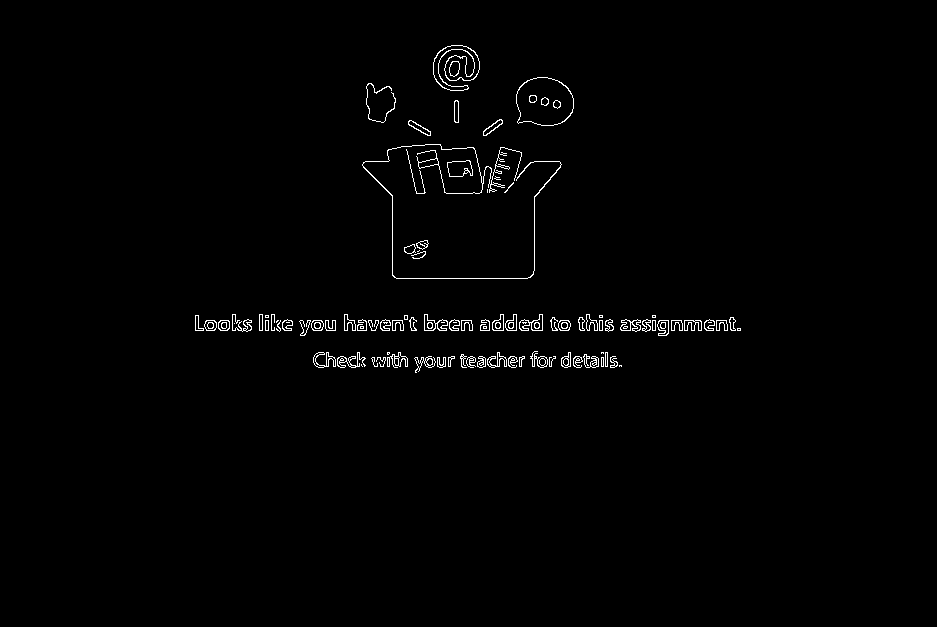

In [ ]:
img = cv.imread('/content/0.PNG',0)
blnk=np.zeros(img.shape,dtype='uint8')
cany = cv.Canny(img,125,175)
retr,thresh = cv.threshold(img,125,255,cv.THRESH_BINARY)
contours,hier = cv.findContours(cany,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(blnk,contours,-1,(255,255,255),1)
cv2_imshow(blnk)

COLOR SPACES

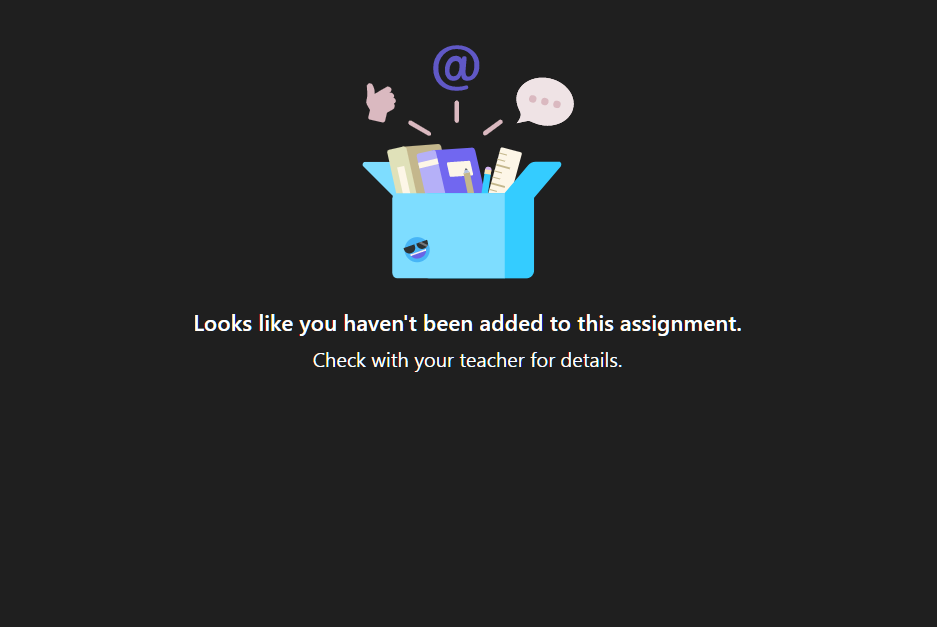

In [ ]:
#BGR to HSV format
'''hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
cv2_imshow(hsv)'''
#BGR to LAB
'''lab = cv.cvtColor(image,cv.COLOR_BGR2LAB)
cv2_imshow(lab)'''
#BGR TO RGB
'''rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
cv2_imshow(rgb)'''


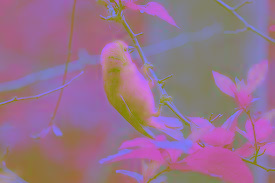

In [5]:
image = cv.imread('/content/download.jfif')
# Converting HSV to LAB in one line
img_hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
cv2_imshow(cv.cvtColor(cv.cvtColor(img_hsv,cv.COLOR_HSV2BGR),cv.COLOR_BGR2LAB))

SPLITTING AND MERGING COLOR CHANNELS IN OPEN CV

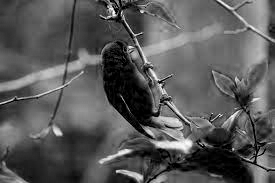

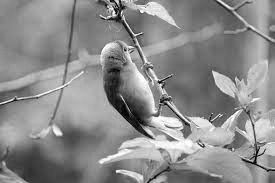

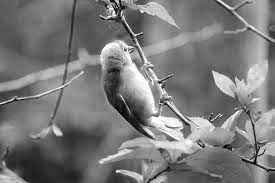

In [6]:
b,g,r = cv.split(image)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
merged = cv.merge([b,g,r])

FACE DETECTION


In [ ]:
import numpy as np
haar_cascade = cv.CascadeClassifier('/content/cass.xml')
image = cv.imread('/content/1642314555300.jpg')
blur_img = cv.GaussianBlur(image,(91,91),0,cv.BORDER_DEFAULT)
mask = np.zeros((3264,2448,3),dtype='uint8')
mask = cv.rectangle(mask,(0,2430),(3264,0),(255,255,255),-1)
out = np.where(mask==np.array([255, 255, 255]), image, blur_img)
faces_rect = haar_cascade.detectMultiScale(out,scaleFactor=1.1,minNeighbors=3)
print('no. of faces detected =',len(faces_rect))
for (x,y,w,h) in faces_rect:
  cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),thickness=5)
cv2_imshow(image)